# Introduction
* This project is about understanding the **Scatter Plot** using *matplotlib* and *seaborn*.
* Explored Different Attributes and ways to create scatter plot :
    * Basic Scatter Plot
    * color
    * marker
    * Transparency
    * colormap
    * Adding Trend Line

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing tips dataset

tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Exploring the dataset

# shape of the dataset
print(tips.shape)

# Exploring categorical features
categories = ['sex','smoker','day','time']

for category in categories:
    print(f"\n{category} Types :\n")
    print(tips[category].value_counts())

(244, 7)

sex Types :

sex
Male      157
Female     87
Name: count, dtype: int64

smoker Types :

smoker
No     151
Yes     93
Name: count, dtype: int64

day Types :

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

time Types :

time
Dinner    176
Lunch      68
Name: count, dtype: int64


# Scatter Plot

A scatter plot is a type of data visualization that displays individual data points on a two-dimensional graph. Each point represents a pair of values:

X-axis: independent variable

Y-axis: dependent variable

* Key Features

Relationship between variables: Helps to identify patterns, trends, or correlations.

* Outliers: Makes unusual points easy to spot.

* Customizations:

Color (hue) → to show categories

Size (s) → to represent magnitude

Marker shape → to differentiate groups

Transparency (alpha) → to handle overlapping points

Trend lines: Often a line of best fit can be added to show the general relationship.

* When to Use

To see if two variables are positively, negatively, or not correlated.

To visually compare groups or categories.

To highlight clusters or patterns in the data.

* Example

X-axis: Total bill amount at a restaurant

Y-axis: Tip amount given by the customer

Color: Customer’s gender

Size: Number of people at the table

This way, scatter plots provide a quick, intuitive understanding of data relationships, making them essential in exploratory data analysis (EDA).

# Basic Scatter plot

## Using Matplotlib

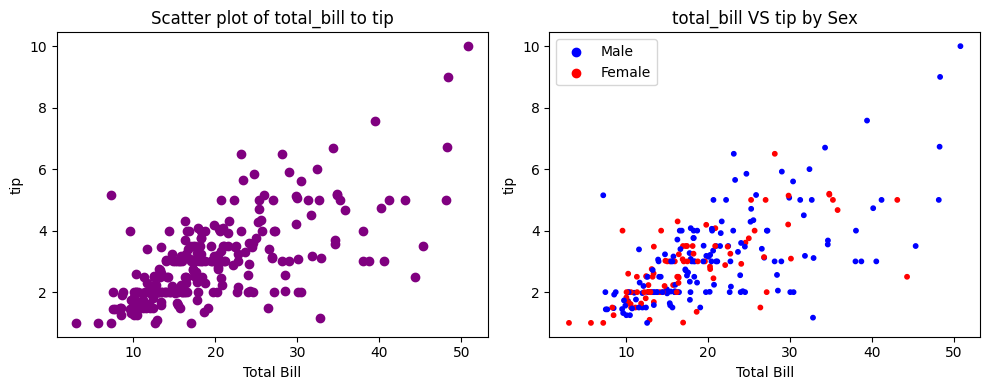

In [4]:
fig, axes = plt.subplots(1,2,figsize=(10,4))

# total bill VS tip 
axes[0].scatter(x = tips['total_bill'], y = tips['tip'], color = 'purple')
axes[0].set_title("Scatter plot of total_bill to tip")
axes[0].set_xlabel("Total Bill")
axes[0].set_ylabel("tip")


#total bill VS tip based by sex
colors = ["blue" if s=='Male' else "Red" for s in tips['sex'] ]
axes[1].scatter(x = tips['total_bill'], y = tips['tip'], c = colors , s = 10)
axes[1].set_title("total_bill VS tip by Sex")
axes[1].set_xlabel("Total Bill")
axes[1].set_ylabel("tip")

# setting labels
axes[1].scatter([],[],c = 'blue', label = 'Male')
axes[1].scatter([],[],c = 'Red', label = 'Female')
axes[1].legend()

plt.tight_layout()
plt.show()

## Using Seaborn

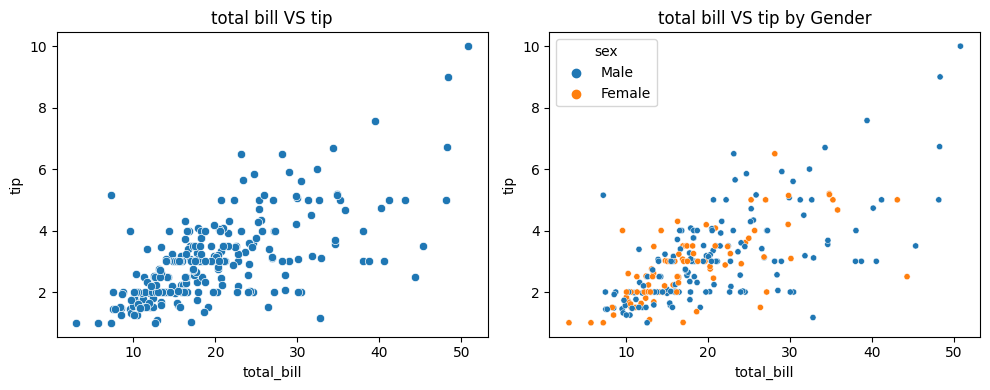

In [5]:
plt.figure(figsize=(10,4))

# total bill VS tip
plt.subplot(1,2,1)
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip')
plt.title("total bill VS tip")

# total bill VS tip by sex
plt.subplot(1,2,2)
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', hue = 'sex', s = 20)
plt.title("total bill VS tip by Gender")

plt.tight_layout()
plt.show()

# Marker and Transparency

* marker - We can change dfferent types of markers
    *  'o' → circle
    * 's' → square
    * '^' → triangle
    * 'x' → cross
    * '*' → star
*  alpha - It is used for Transparency.

## using Matplotlib

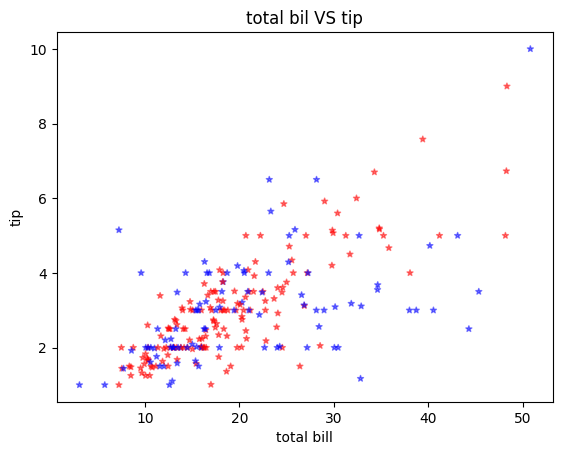

In [6]:
# total bill VS tip by smoker

colors = ["blue" if s == "Yes" else "Red" for s in tips['smoker']]
plt.scatter(x = tips['total_bill'], y = tips['tip'], c = colors, marker = '*', s = 20, alpha = 0.5)
plt.title("total bil VS tip")
plt.xlabel("total bill")
plt.ylabel("tip")

# setting labels
plt.scatter([],[], c = 'blue', label = 'Smoker')
plt.scatter([],[], c = 'red', label = 'Non-Smoker')

plt.show()

## Using Seaborn

<Axes: xlabel='total_bill', ylabel='tip'>

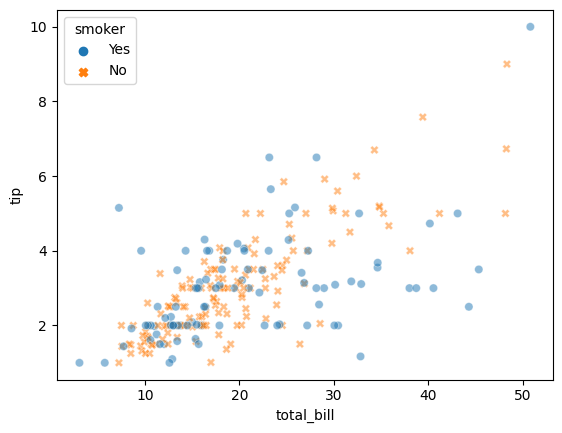

In [7]:
sns.scatterplot(data = tips , x = 'total_bill', y = 'tip', style = 'smoker', hue = 'smoker', alpha = 0.5)

# Colormap for continuous values
* We can set color map for continous values in scatter plot with the help of 'cmap' attribute
    * cmap='viridis'   # default, beautiful green→yellow
    * cmap='plasma'    # purple→yellow
    * cmap='inferno'   # black→red→yellow
    * cmap='magma'     # dark purple→orange
    * cmap='cividis'   # blue→yellow, colorblind-friendly


## Using Matplotlib

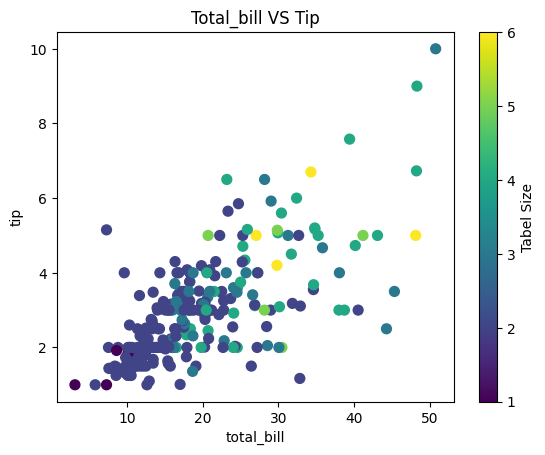

In [8]:
colors = tips['size']
plt.scatter(tips['total_bill'], tips['tip'], c = colors, cmap = 'viridis', s = 50)
plt.title("Total_bill VS Tip")
plt.xlabel("total_bill")
plt.ylabel("tip")

# setting label
plt.colorbar(label = 'Tabel Size')

## using seaborn

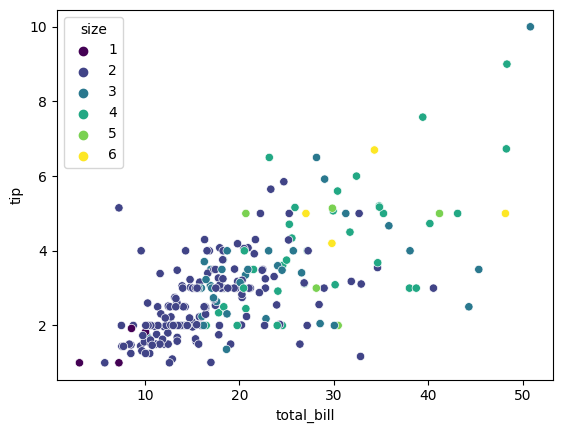

In [9]:
sns.scatterplot(data = tips , x = 'total_bill', y = 'tip', hue = 'size', palette = 'viridis')
plt.show()

# Adding Trend Line

## Using matplotlib

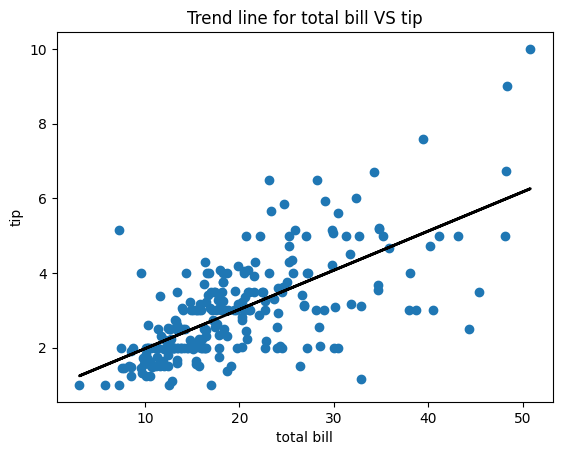

In [10]:
m, b = np.polyfit(tips['total_bill'], tips['tip'], 1)
plt.scatter(tips['total_bill'], tips['tip'])
plt.plot(tips['total_bill'], m*tips['total_bill']+b, color = 'black', linewidth = 2)
plt.title("Trend line for total bill VS tip")
plt.xlabel("total bill")
plt.ylabel("tip")
plt.show()

## using Seaborn

Seaborn uses sns.lmplot and sns.regplot